# 제 4장 금융데이터 시각화

## 1. 시장별 종목리스트를 가지고 와서 시각화

### (1) 데이터 수집

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
krx = fdr.StockListing("KRX-DESC") 
krx

c:\users\operator-70\appdata\local\programs\python\python39\lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


,Code,Name,Market,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,3S,KOSDAQ,전자부품 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,김세완,http://www.3sref.com,서울특별시
1,095570,AJ네트웍스,KOSPI,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
2,006840,AK홀딩스,KOSPI,기타 금융업,지주사업,1999-08-11,12월,"채형석, 백차현(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,APS,KOSDAQ,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,AP시스템,KOSDAQ,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2792,000540,흥국화재,KOSPI,보험업,손해보험,1974-12-05,12월,임규준,http://www.insurance.co.kr,서울특별시
2793,000545,흥국화재우,KOSPI,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2794,003280,흥아해운,KOSPI,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2795,037440,희림,KOSDAQ,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호 (각자대표)",http://www.heerim.com,서울특별시


In [ ]:
# 경고메세지 없애는 코드
import warnings
warnings.filterwarnings(action='ignore') 

#### 위코드가 진행이 되지 않는다면 아래코드를 이용해서 데이터를 진행하기

In [85]:
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0,encoding='euc-kr')[0]
# cols_ren = {'회사명':'Name', '종목코드':'Code', '업종':'Sector', '주요제품':'Industry', 
#                     '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
#                     '홈페이지':'HomePage', '지역':'Region', }
# df_listing = df_listing.rename(columns = cols_ren)
# df_listing['Code'] = df_listing['Code'].apply(lambda x: '{:06d}'.format(x))
# df_listing['ListingDate'] = pd.to_datetime(df_listing['ListingDate'])
# krx = df_listing
# krx

### (2) 시각화 준비 및 한글폰트 출력 설정

#### 1) 시각화를 위한 라이브러리 실행

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 2) 한글폰트 출력 설정 함수 및 실행코드

In [88]:
def get_font_family():
    import platform
    system_name = platform.system()
    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath ="usr/폰트경로"
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"

    return font_family

In [89]:
font_family = get_font_family()
plt.rc("font", family=font_family)

plt.rc("axes", unicode_minus=False)

plt.style.use("ggplot")

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### (3) 시장별 기업 수 시각화

#### 1) 기업수 확인

In [90]:
krx["Market"].value_counts()

Market
KOSDAQ           1654
KOSPI             953
KONEX             129
KOSDAQ GLOBAL      49
Name: count, dtype: int64

#### 2) 라인그래프로 표현

<Axes: xlabel='Market'>

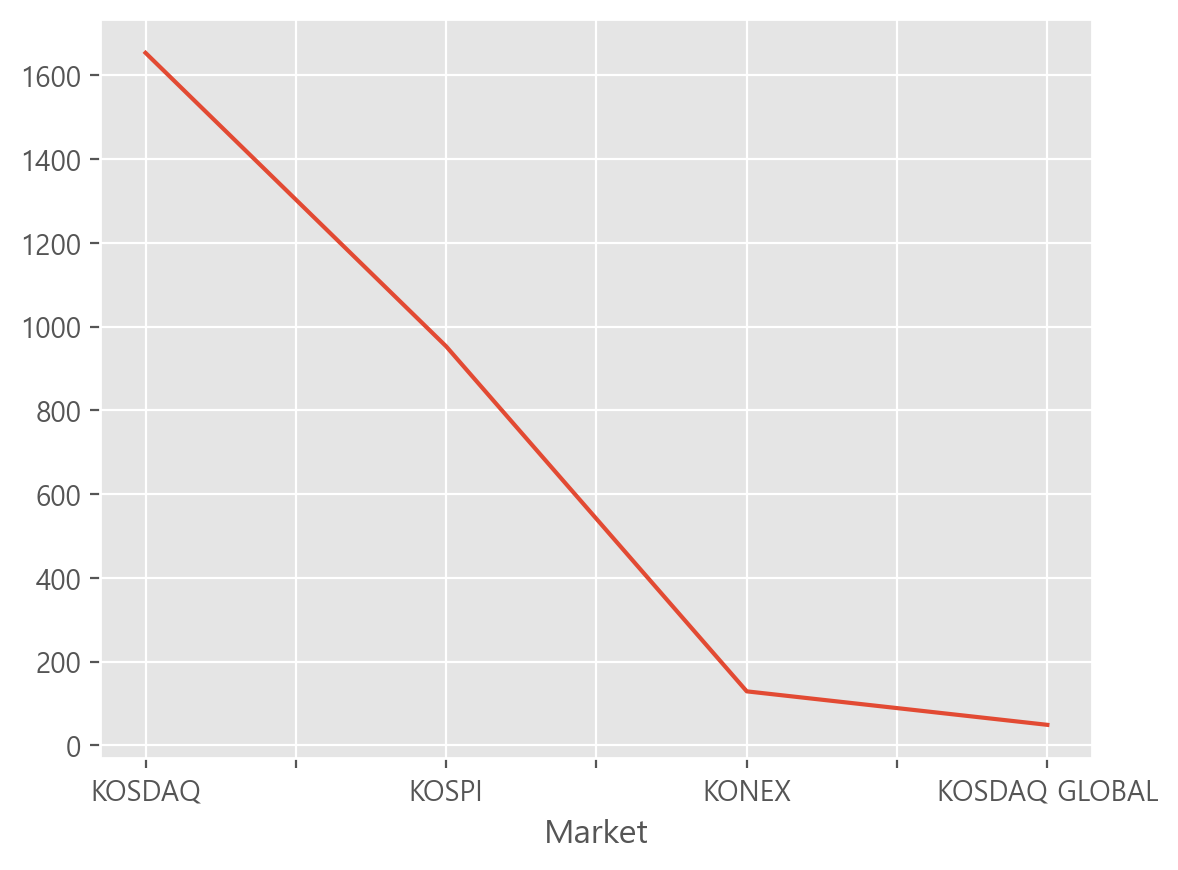

In [91]:
krx["Market"].value_counts().plot()

#### 3) bar 그래프로 표현

<Axes: ylabel='Market'>

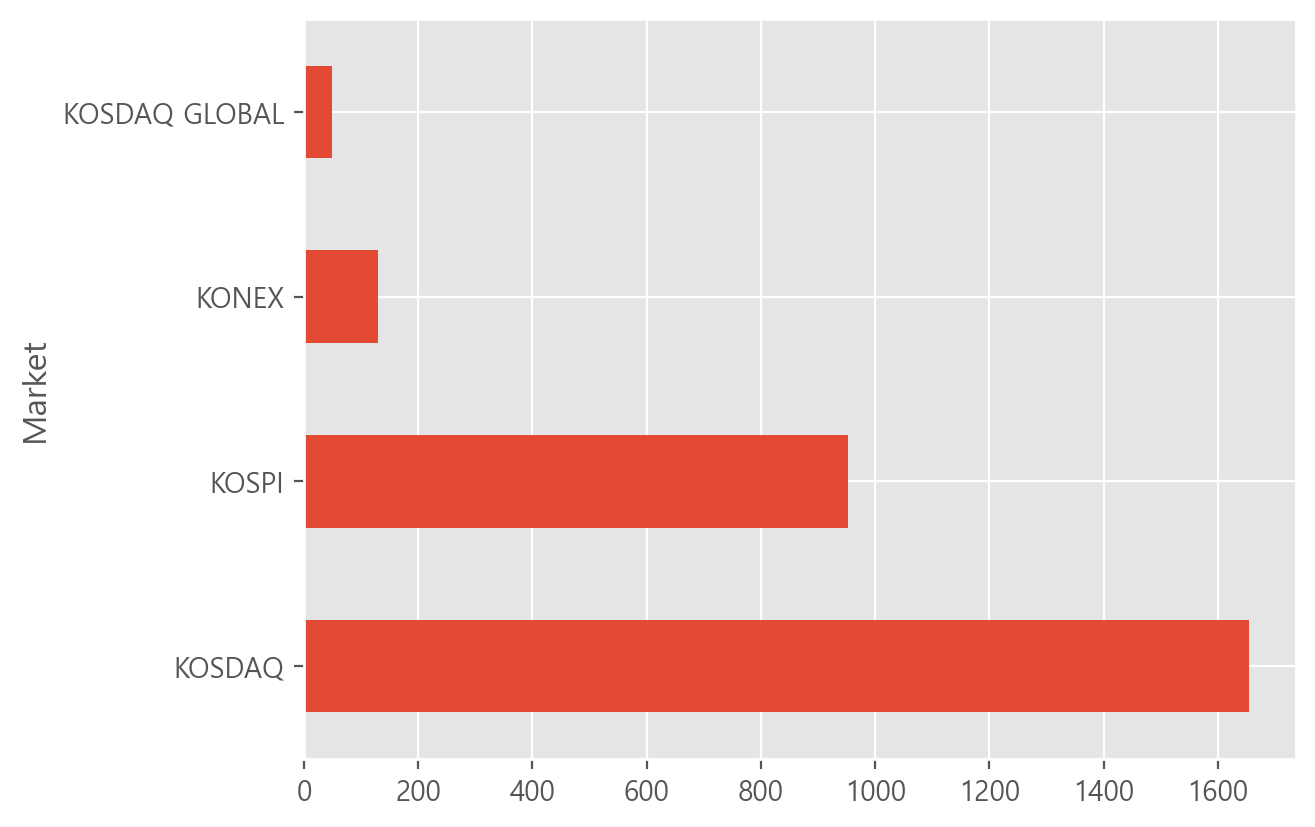

In [92]:
krx["Market"].value_counts().plot.barh()

#### 4) countplot 그래프

<Axes: xlabel='count', ylabel='Market'>

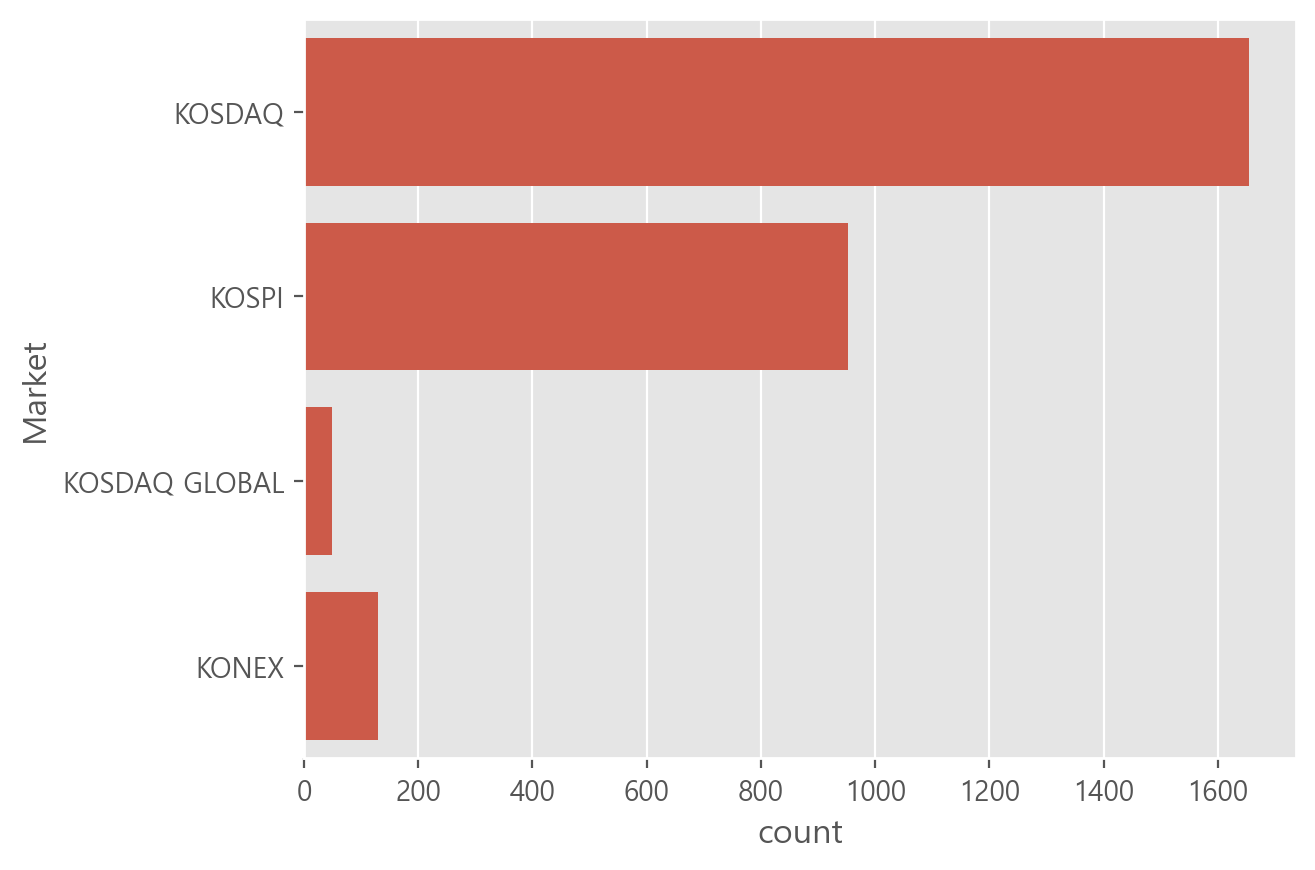

In [93]:
sns.countplot(data=krx, y="Market")

### (4) Setor 시각화

#### 1) 빈도수 확인

In [94]:
# KRX-DESC -> KRX로 수정
sector_count_top = krx["Sector"].value_counts().head(30)
sector_count_top

Sector
소프트웨어 개발 및 공급업                           177
특수 목적용 기계 제조업                            163
전자부품 제조업                                 129
금융 지원 서비스업                               104
의약품 제조업                                  102
자동차 신품 부품 제조업                            100
기타 화학제품 제조업                               98
기타 금융업                                    94
반도체 제조업                                   71
자연과학 및 공학 연구개발업                           69
통신 및 방송 장비 제조업                            67
1차 철강 제조업                                 64
의료용 기기 제조업                                62
기초 화학물질 제조업                               50
플라스틱제품 제조업                                47
일반 목적용 기계 제조업                             46
기초 의약물질 및 생물학적 제제 제조업                     41
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   40
기타 전문 도매업                                 40
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         37
기타 식품 제조업                                 36
의료용품 및 기타 의약 관련제품 제조업                     33
봉제의

#### 2) barh로 시각화

<Axes: title={'center': 'Sector 빈도수'}, ylabel='Sector'>

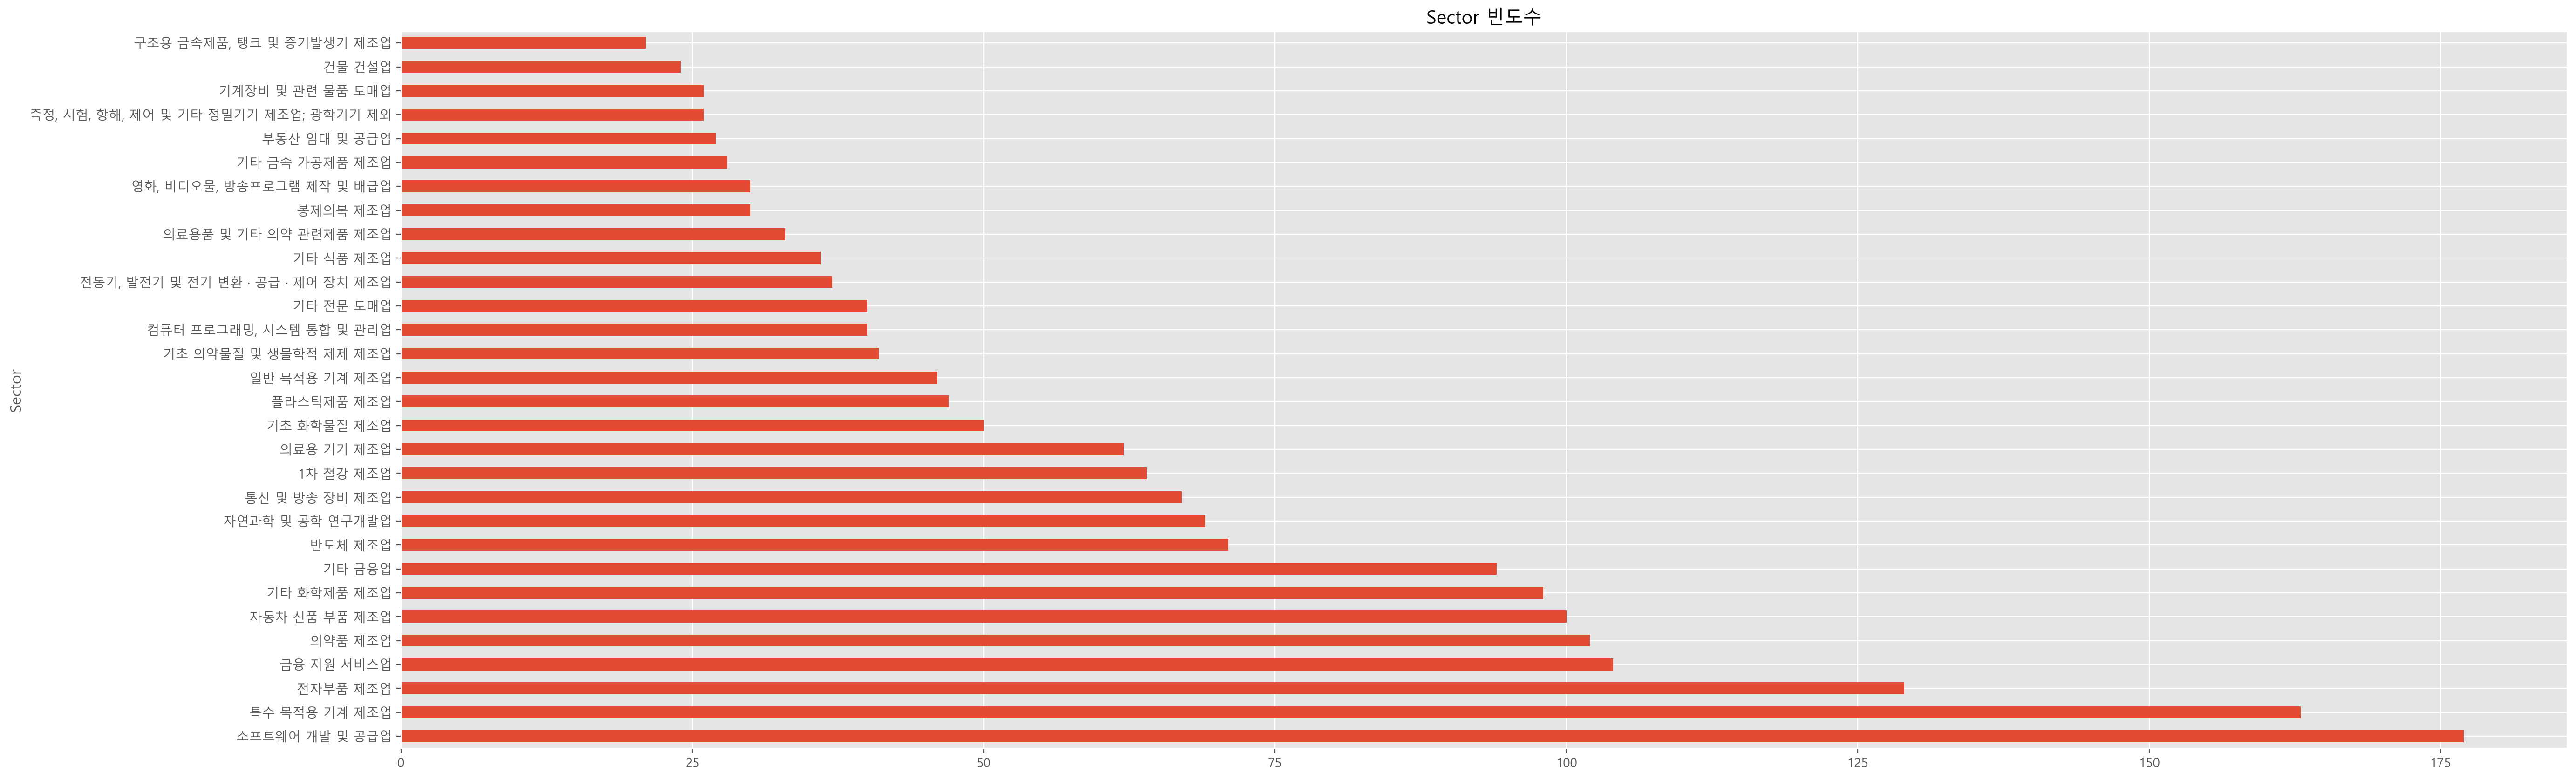

In [95]:
sector_count_top.plot.barh(figsize=(30, 10), title="Sector 빈도수")

#### 3) countplot로 시각화

<Axes: xlabel='count', ylabel='Sector'>

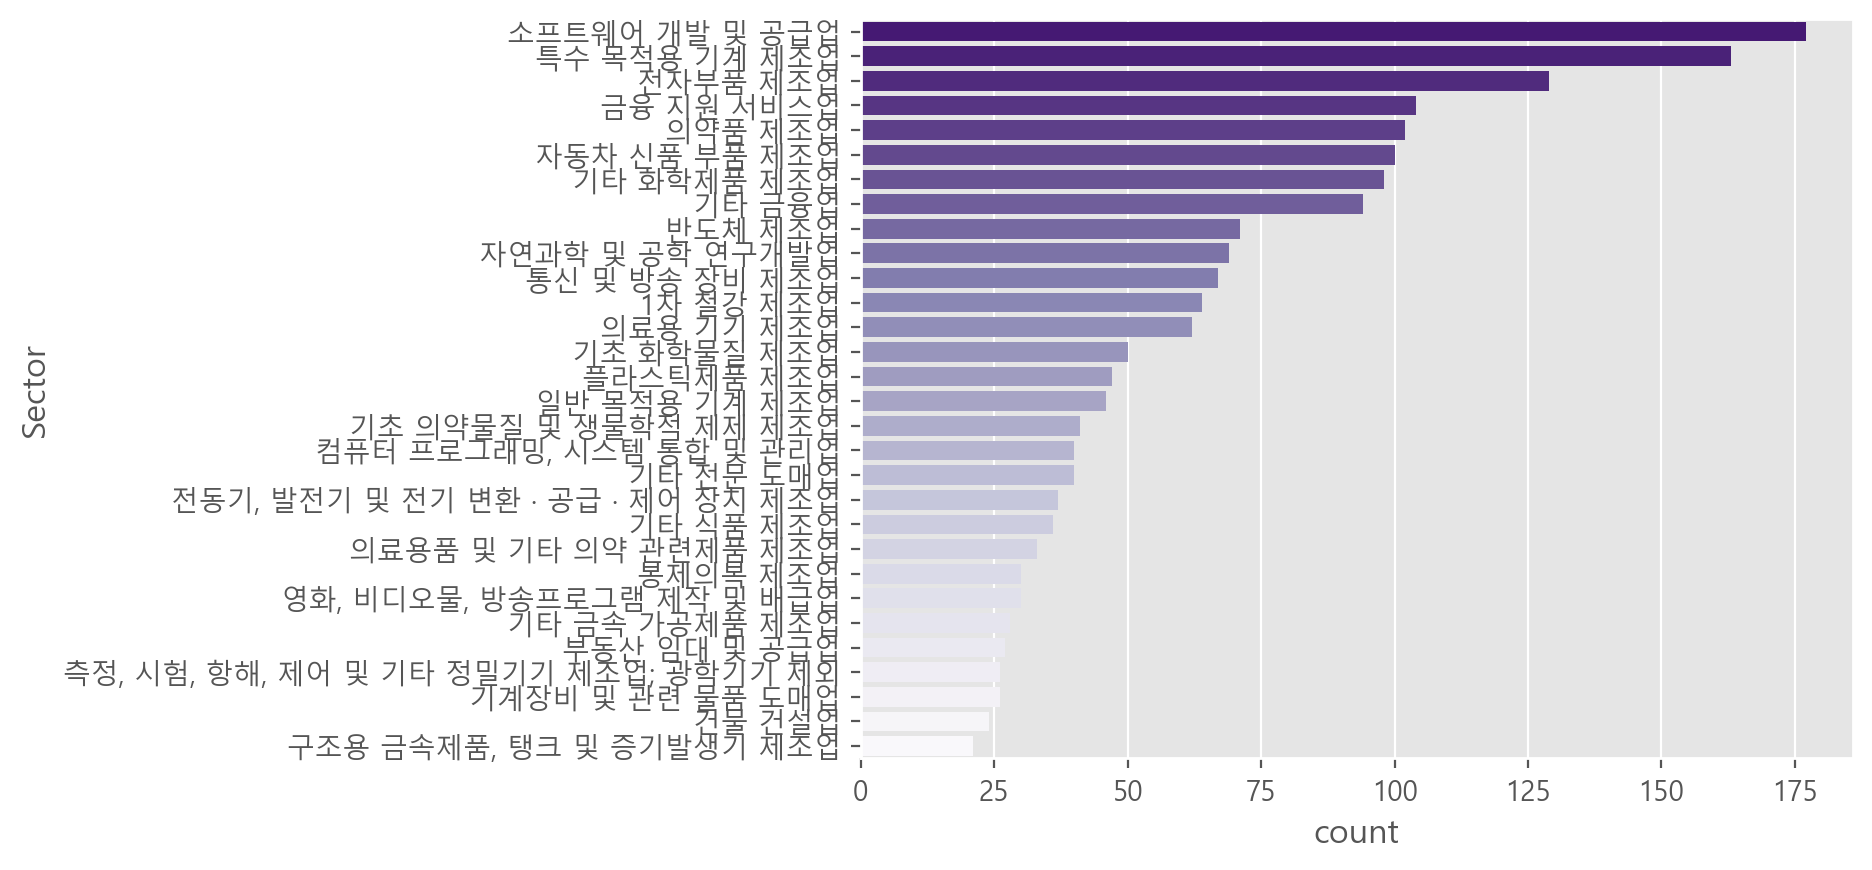

In [96]:
sns.countplot(data=krx[krx["Sector"].isin(sector_count_top.index)],
y="Sector", palette="Purples_r", order=sector_count_top.index)

### (5) Industry 시각화

#### 1) 빈도 수 확인

In [97]:
krx['Industry'].value_counts()

Industry
기업인수합병                            44
지주회사                              21
지주사업                               9
기업인수 및 합병                          9
모바일게임                              7
                                  ..
펠리노-1 단백질 저해제, 오토택신 저해제            1
골프용 거리측정기                          1
LCD/OLED 압흔검사기, 2차전지 검사장비          1
화장품, 라미네이팅필름, 라미네이팅기계              1
OLED Mask 인장기, OLED Mask 검사기 등     1
Name: count, Length: 2466, dtype: int64

#### 2) bar 그래프

<Axes: title={'center': 'Industry 시각화'}, ylabel='Industry'>

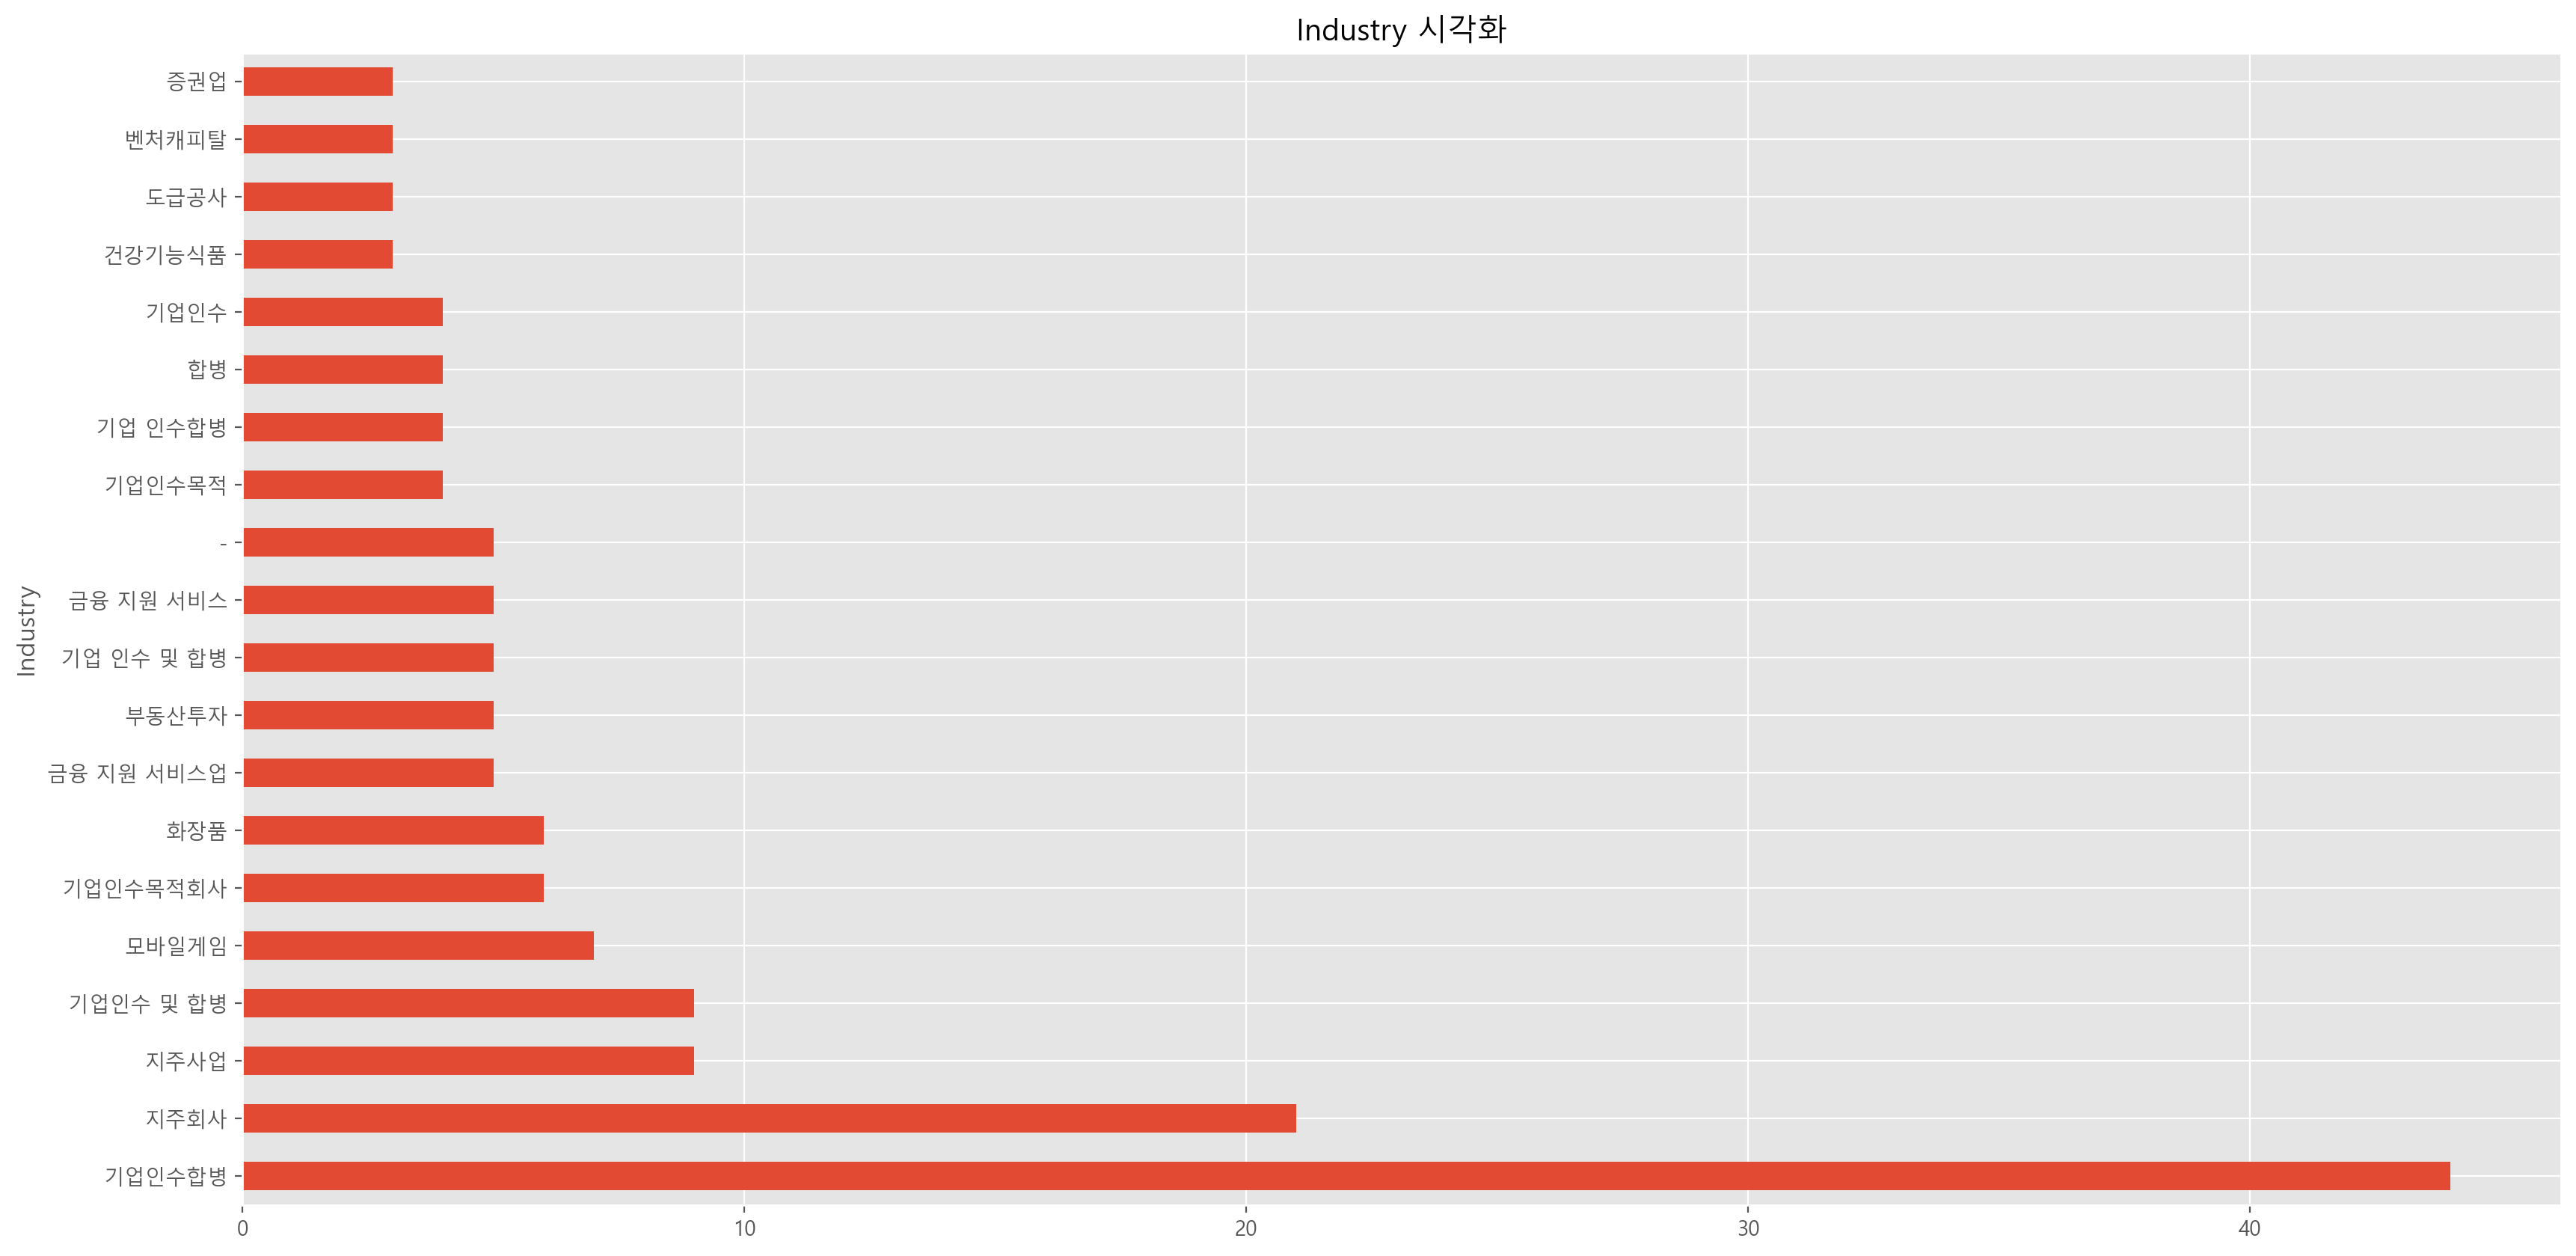

In [98]:
krx['Industry'].value_counts().head(20).plot.barh(figsize=(20,10) , title="Industry 시각화")

#### 3) countplot 그래프

<Axes: xlabel='count', ylabel='Industry'>

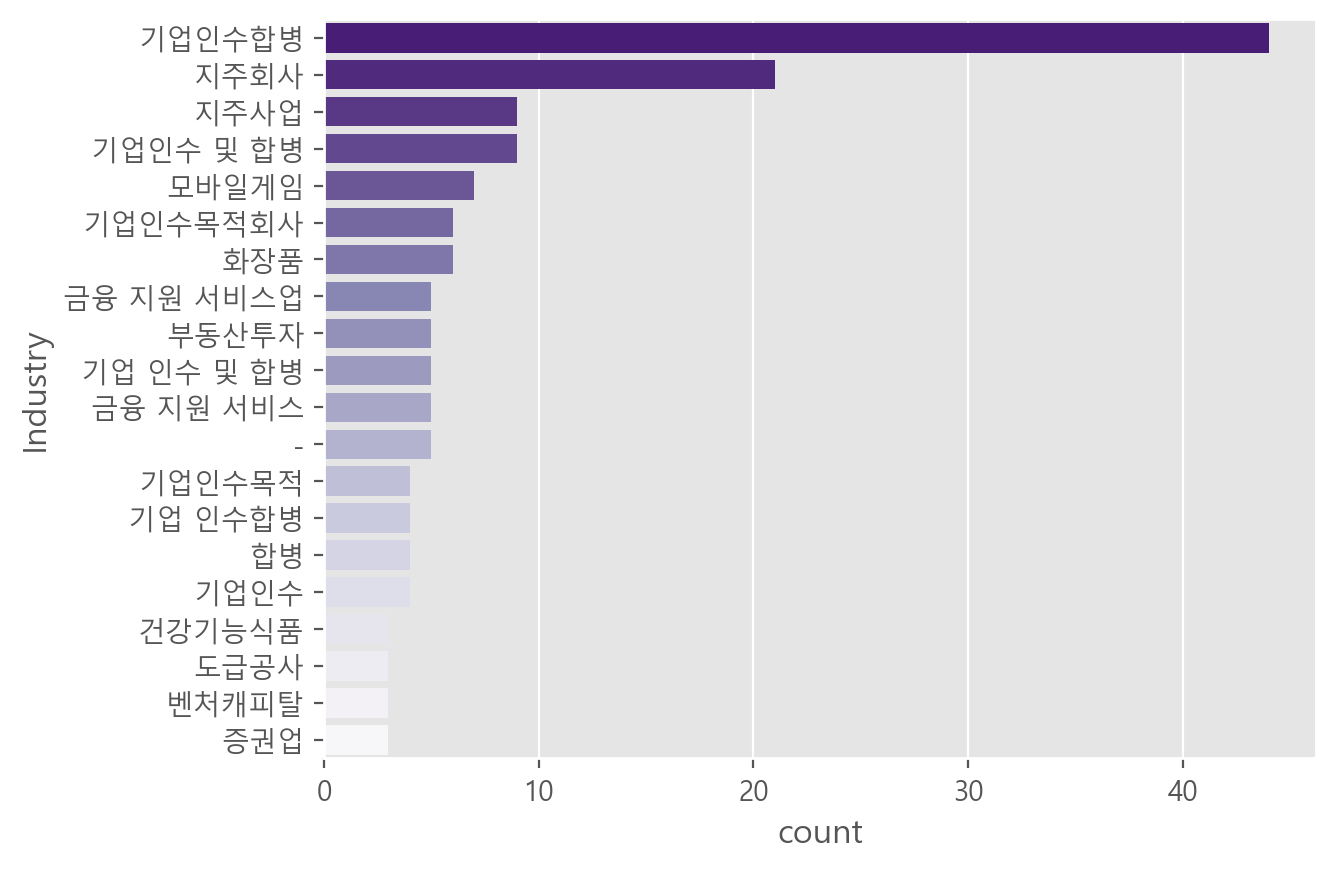

In [99]:
sns.countplot(data=krx[krx["Industry"].isin(krx["Industry"].value_counts().head(20).index)],
                y="Industry", palette="Purples_r", order=krx["Industry"].value_counts().head(20).index)

### (6) Region 

#### 1) 빈도 수 확인

In [100]:
krx['Region'].value_counts()

Region
서울특별시      1079
경기도         765
충청남도        106
인천광역시        96
경상남도         93
충청북도         91
부산광역시        80
경상북도         71
대구광역시        56
대전광역시        56
전라북도         34
울산광역시        28
강원특별자치도      28
전라남도         24
광주광역시        20
세종특별자치시      12
홍콩            8
제주특별자치도       7
미국            6
케이맨 제도        5
일본            2
싱가포르          1
Name: count, dtype: int64

#### 2) bar 그래프

<Axes: title={'center': 'Region 시각화'}, ylabel='Region'>

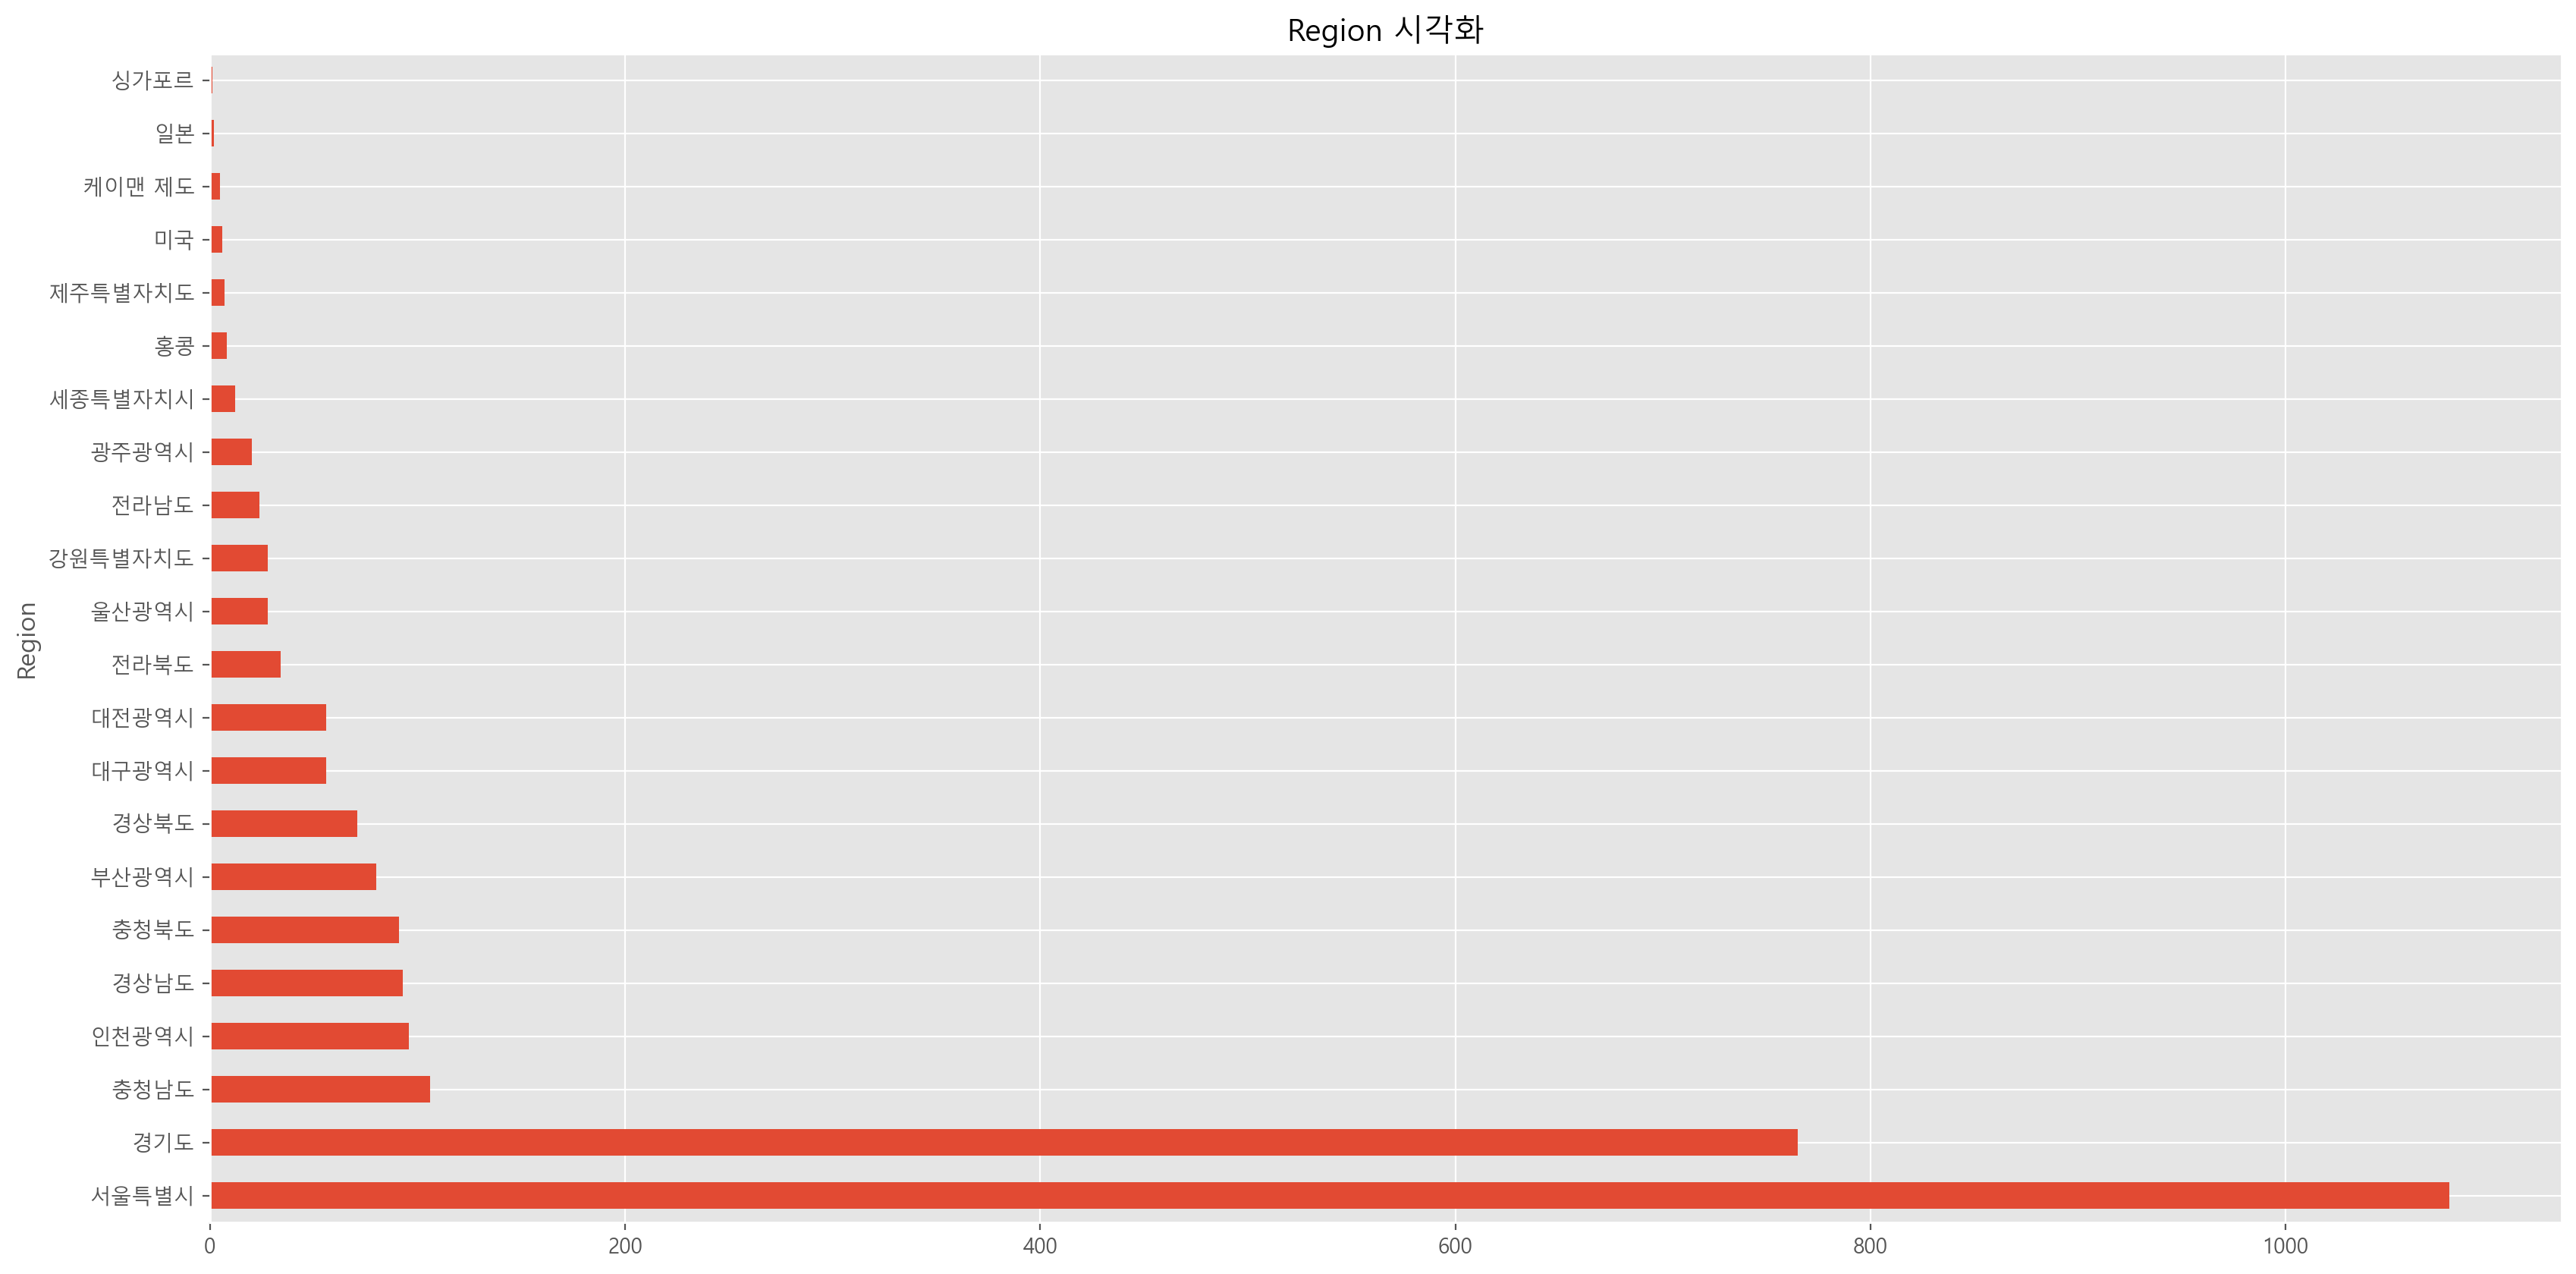

In [101]:
krx['Region'].value_counts().plot.barh(figsize=(20,10), title="Region 시각화")

#### 3) countplot, 빈도수 순서가 아닌 지역이름 순으로 정렬했을 때의 시각화

<Axes: xlabel='count', ylabel='Region'>

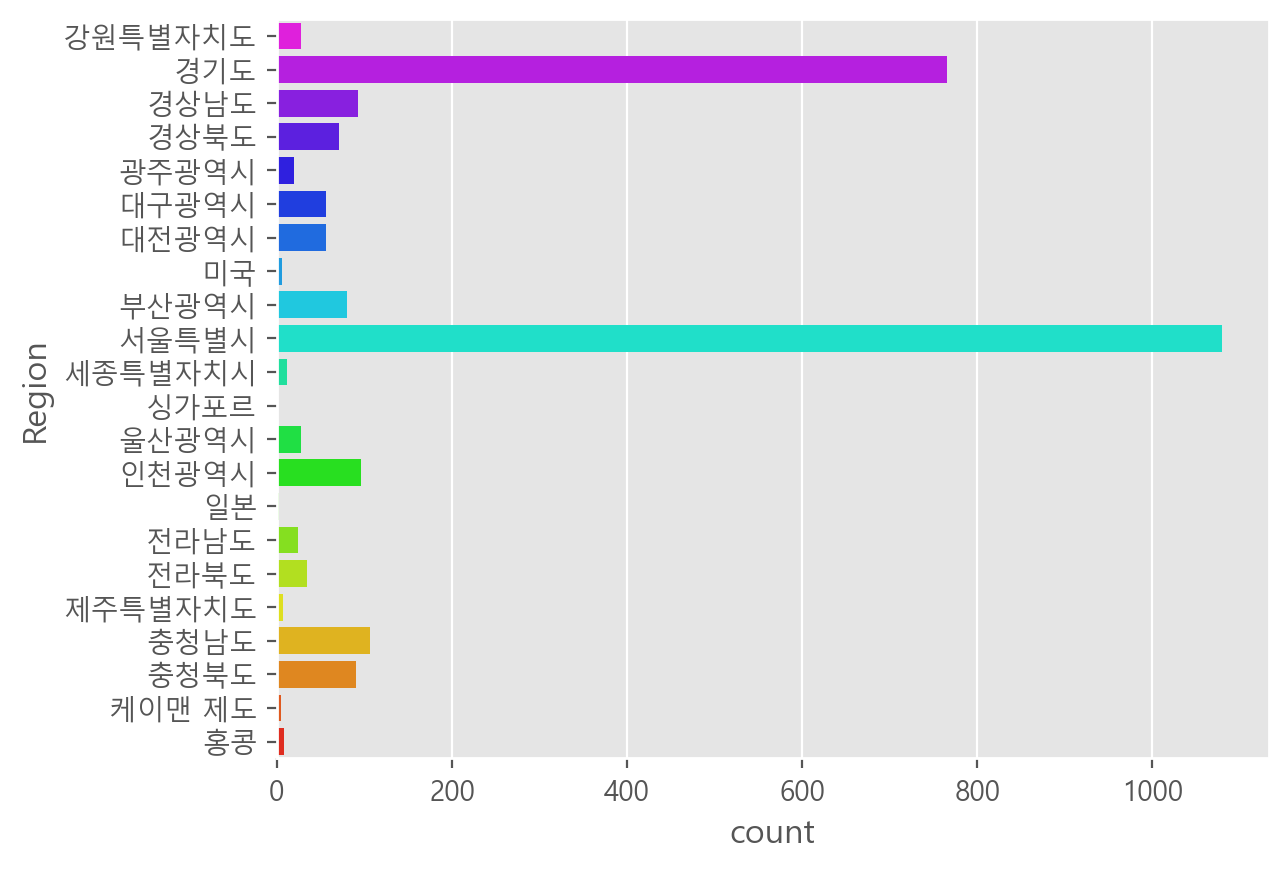

In [102]:
sns.countplot(data=krx.sort_values(by="Region"), palette="gist_rainbow_r", y="Region")

### (7) 지역별 상장 시장 종목 빈도수 구하기

In [103]:
pd.crosstab(krx["Market"],krx["Region"] )

Region,강원특별자치도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,6,39,2,5,3,3,6,0,1,39,...,0,4,0,3,3,0,5,9,0,0
KOSDAQ,16,547,47,41,9,31,40,6,42,610,...,11,65,2,13,18,2,70,62,4,8
KOSDAQ GLOBAL,2,19,0,2,0,1,2,0,1,10,...,0,1,0,0,1,0,5,4,0,0
KOSPI,4,160,44,23,8,21,8,0,36,420,...,17,26,0,8,12,5,26,16,1,0


<Axes: xlabel='count', ylabel='Region'>

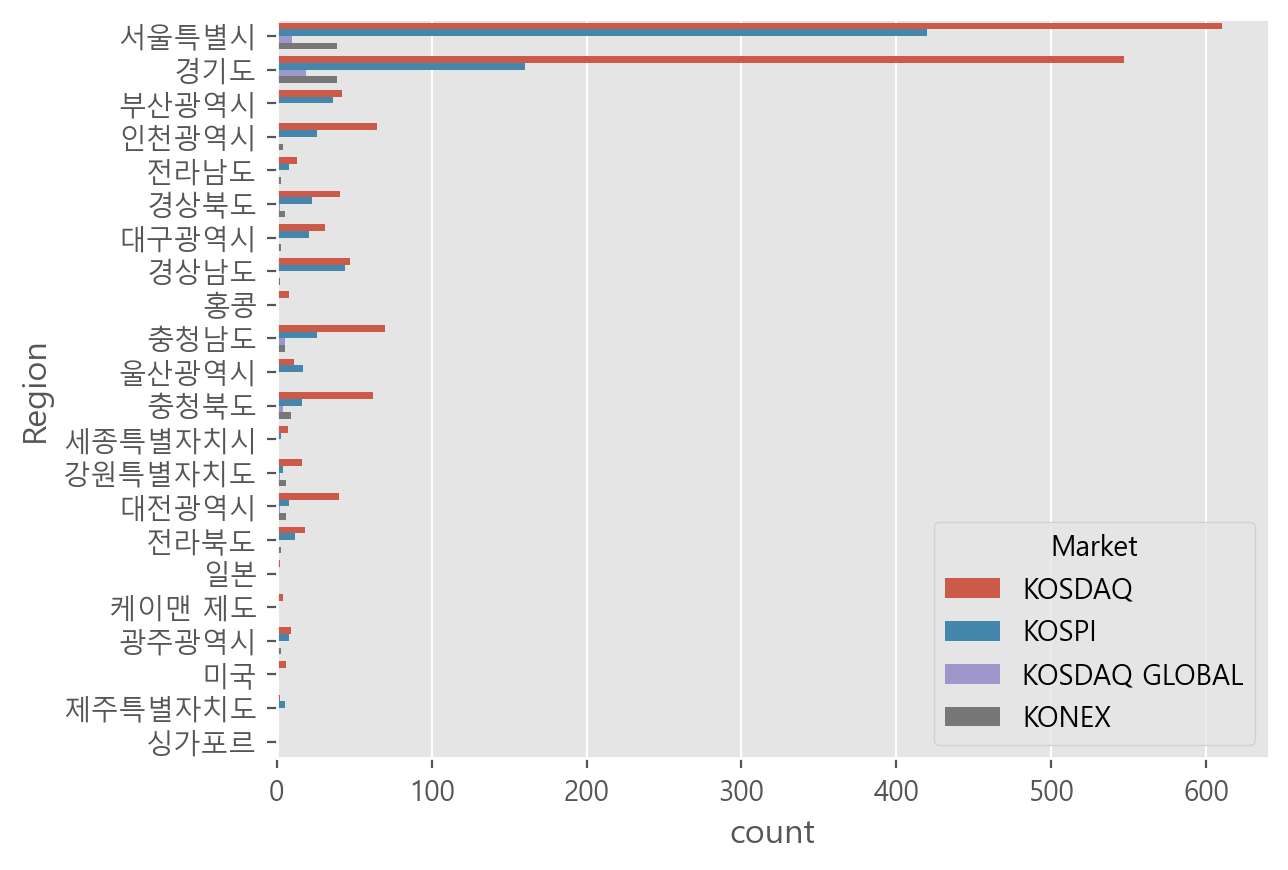

In [104]:
sns.countplot(data=krx, y="Region", hue='Market')

### (8) 연도별 상장 종목 빈도수 분석

#### 1) 연도별 빈도수 확인을 위한 전처리

In [105]:
krx_market_year = pd.crosstab(krx['Market'], krx['ListingDate'])
krx_market_year

ListingDate,1956-03-03,1956-07-02,1962-11-01,1964-01-04,1966-03-18,1968-10-21,1968-12-27,1969-05-13,1969-09-08,1969-11-20,...,2023-12-01,2023-12-04,2023-12-05,2023-12-06,2023-12-12,2023-12-13,2023-12-21,2023-12-22,2024-01-02,2024-01-04
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,1,2,0,1
KOSDAQ GLOBAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KOSPI,3,1,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,0,1,1,0


In [106]:
krx_market_year.columns = krx_market_year.columns.year
krx_market_year

ListingDate,1956,1956,1962,1964,1966,1968,1968,1969,1969,1969,...,2023,2023,2023,2023,2023,2023,2023,2023,2024,2024
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,2,1,2,1,1,1,1,2,0,1
KOSDAQ GLOBAL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KOSPI,3,1,1,1,1,1,5,1,1,1,...,0,0,0,0,0,0,0,1,1,0


In [107]:
krx_market_year = krx_market_year.groupby(krx_market_year.columns, axis=1).sum()
krx_market_year

ListingDate,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,20,16,9,12,12,8,6,14,14,0
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,80,55,61,84,81,71,88,111,127,1
KOSDAQ GLOBAL,0,0,0,0,0,0,0,0,0,0,...,6,4,7,0,4,2,1,0,0,0
KOSPI,4,1,1,1,6,5,4,1,3,21,...,17,18,20,19,15,14,26,9,19,1


#### 2) 라인그래프로 표현

<Axes: xlabel='ListingDate'>

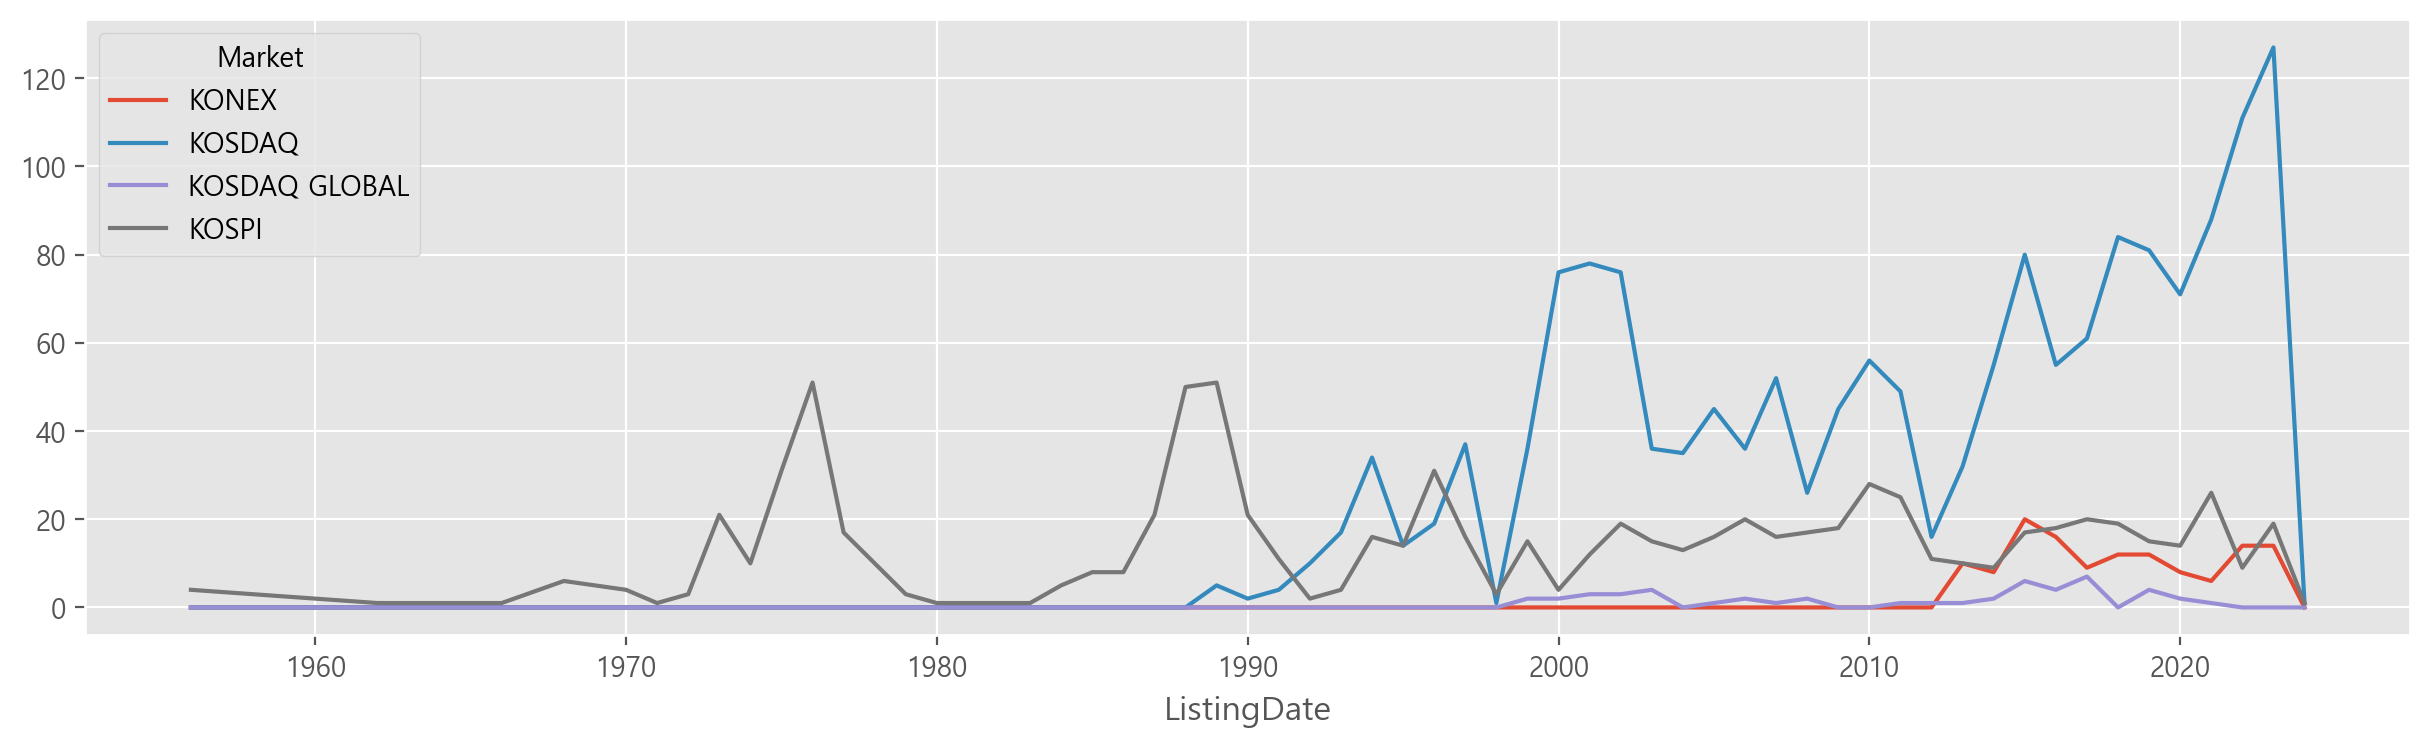

In [108]:
krx_market_year.T.plot(figsize=(15,4))

#### 3) 시장별 빈도수를 sub plot을 이용해 표현

array([<Axes: xlabel='ListingDate'>, <Axes: xlabel='ListingDate'>,
       <Axes: xlabel='ListingDate'>, <Axes: xlabel='ListingDate'>],
      dtype=object)

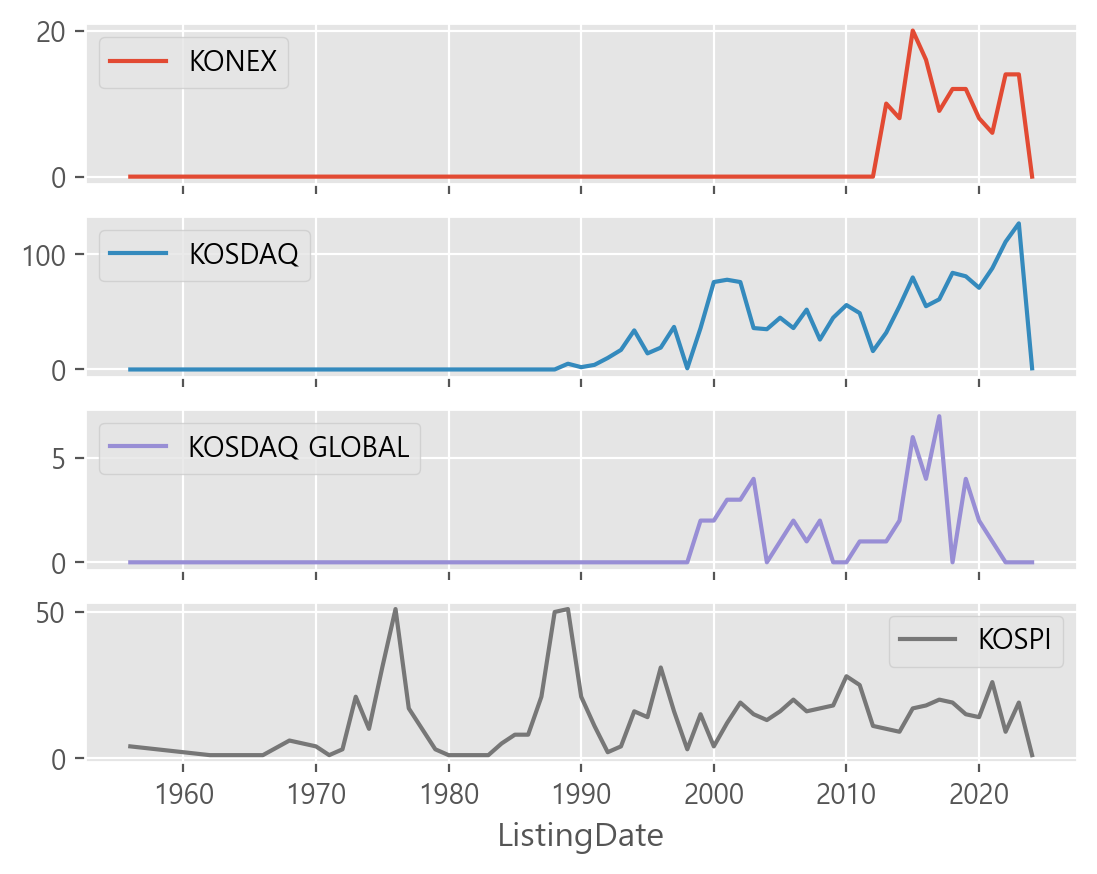

In [109]:
krx_market_year.T.plot(subplots=True)


#### 4) 최근 20년동안의 상장 종목 수 표현

<Axes: ylabel='ListingDate'>

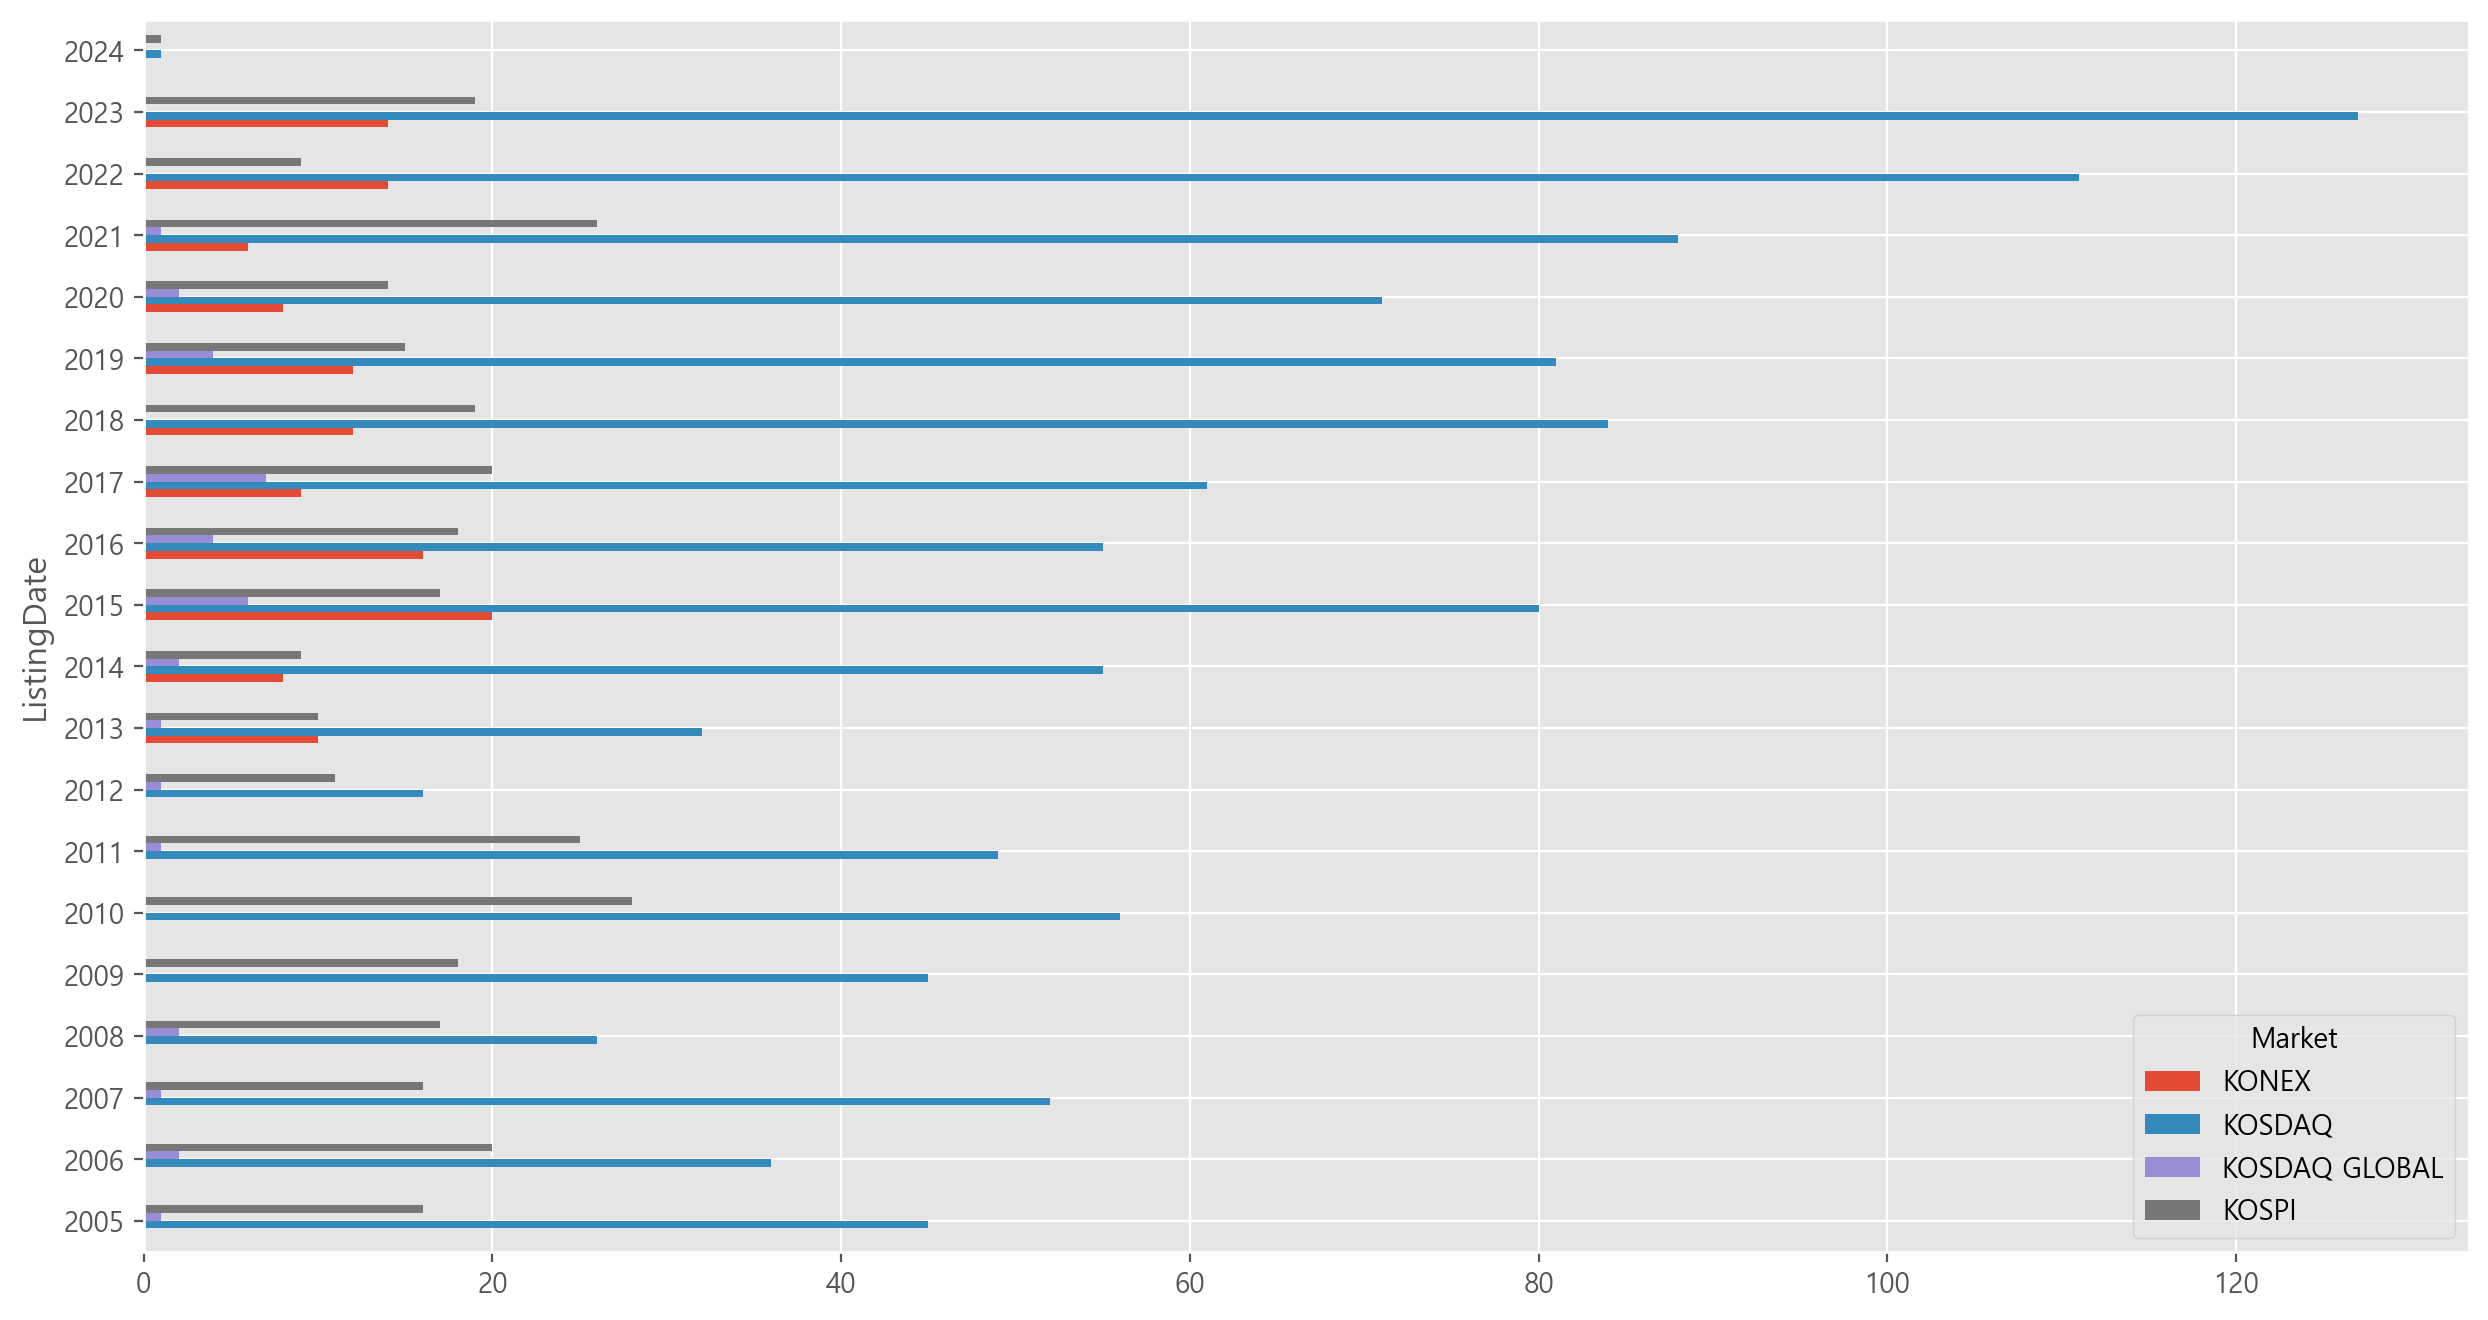

In [110]:
krx_market_year.T[-20:].plot.barh(figsize=(15,8))

#### 5) pivot table을 이용해서 표현해보기 

In [111]:
krx_year_market = krx.groupby(["ListingDate", "Market"])["Code"].count()
krx_year_market

ListingDate  Market
1956-03-03   KOSPI     3
1956-07-02   KOSPI     1
1962-11-01   KOSPI     1
1964-01-04   KOSPI     1
1966-03-18   KOSPI     1
                      ..
2023-12-21   KOSDAQ    1
2023-12-22   KOSDAQ    2
             KOSPI     1
2024-01-02   KOSPI     1
2024-01-04   KOSDAQ    1
Name: Code, Length: 2098, dtype: int64

In [112]:
krx_year_market = krx.groupby(["ListingDate", "Market"])["Code"].count().reset_index(name="count")
krx_year_market

,ListingDate,Market,count
0,1956-03-03,KOSPI,3
1,1956-07-02,KOSPI,1
2,1962-11-01,KOSPI,1
3,1964-01-04,KOSPI,1
4,1966-03-18,KOSPI,1
...,...,...,...
2093,2023-12-21,KOSDAQ,1
2094,2023-12-22,KOSDAQ,2
2095,2023-12-22,KOSPI,1
2096,2024-01-02,KOSPI,1


In [113]:
krx_year_market = pd.pivot_table(data=krx, index=["ListingDate", "Market"], values="Code", aggfunc="count")
krx_year_market = krx_year_market.rename(columns={"Code": "count"})
krx_year_market

count
ListingDate Market       
1956-03-03  KOSPI       3
1956-07-02  KOSPI       1
1962-11-01  KOSPI       1
1964-01-04  KOSPI       1
1966-03-18  KOSPI       1
...                   ...
2023-12-21  KOSDAQ      1
2023-12-22  KOSDAQ      2
            KOSPI       1
2024-01-02  KOSPI       1
2024-01-04  KOSDAQ      1

[2098 rows x 1 columns]

<Axes: xlabel='ListingDate', ylabel='count'>

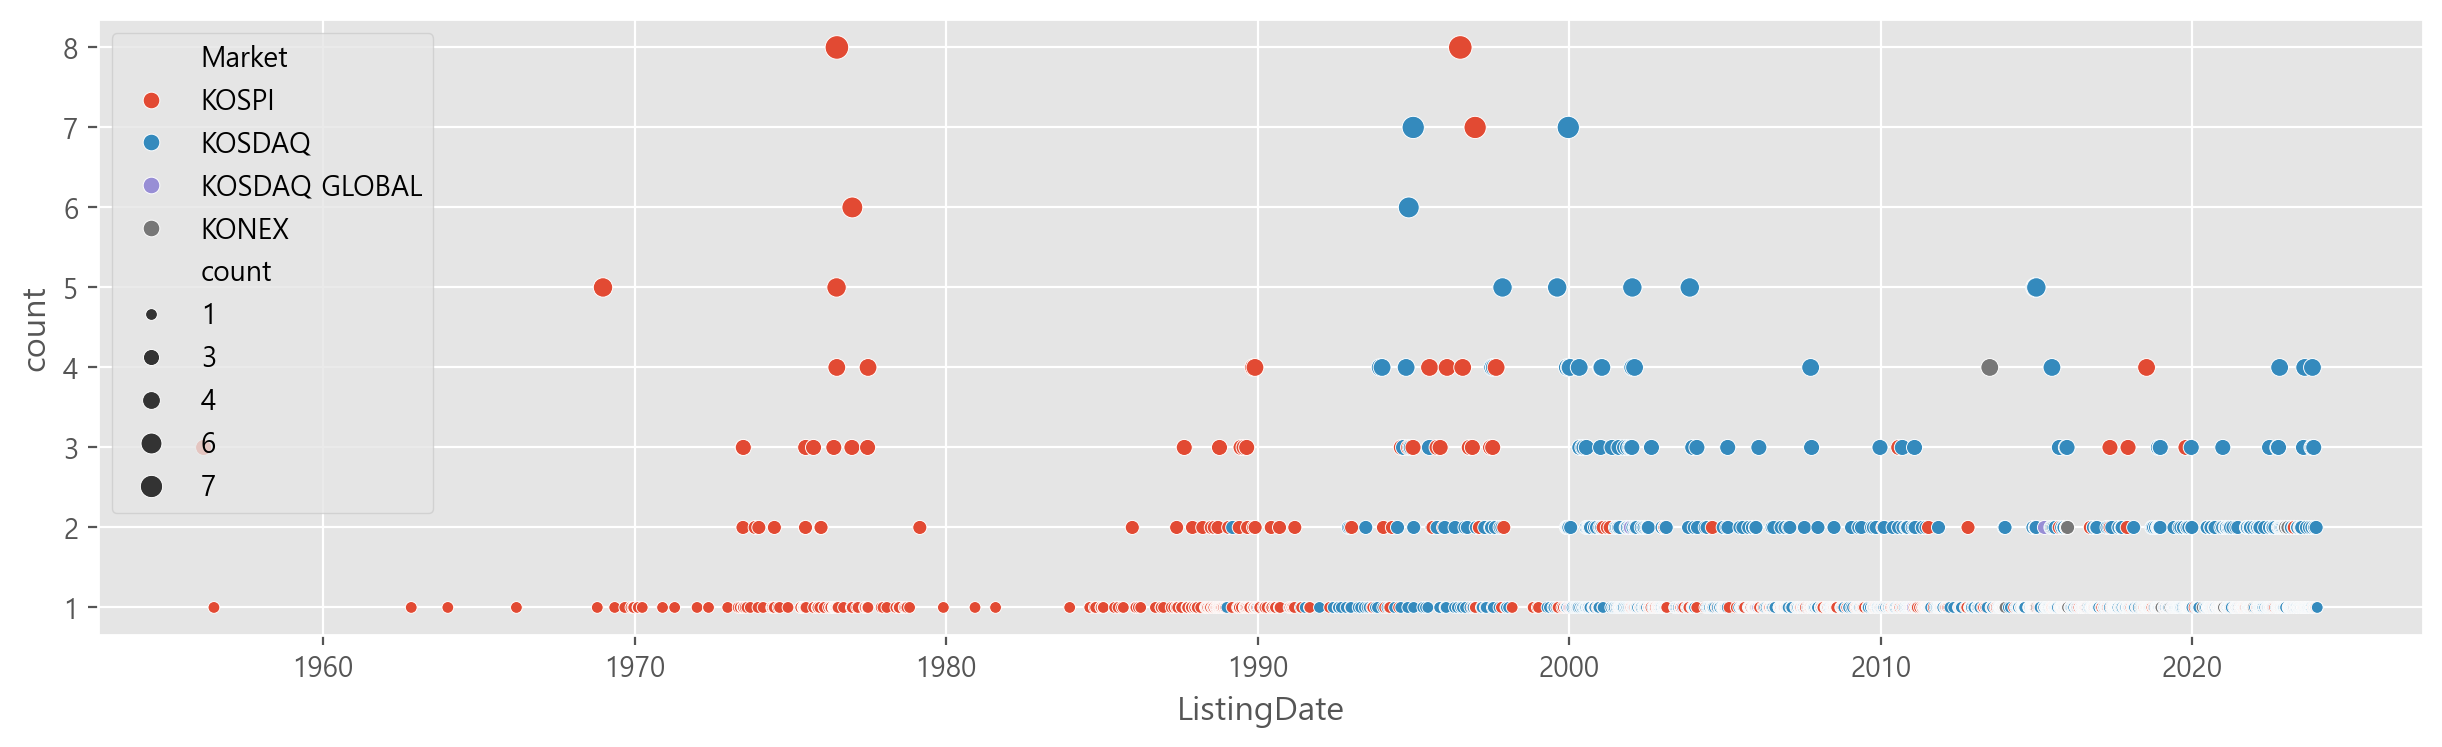

In [114]:
plt.figure(figsize=(15, 4))
sns.scatterplot(data=krx_year_market, 
                x="ListingDate", y="count", 
                hue="Market", size="count")

## 2. 주가 데이터를 이용해서 이동평균선 구하기

### (1) 데이터 수집

In [125]:
import pandas as pd
import FinanceDataReader as fdr

sm = fdr.DataReader("005930", "2022-01-03", "2022-12-31")
sm

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,0.003831
2022-01-04,78800,79200,78300,78700,12427416,0.001272
2022-01-05,78800,79000,76400,77400,25470640,-0.016518
2022-01-06,76700,77600,76600,76900,12931954,-0.006460
2022-01-07,78100,78400,77400,78300,15163757,0.018205
...,...,...,...,...,...,...
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454


### (2) 라인그래프로 표현

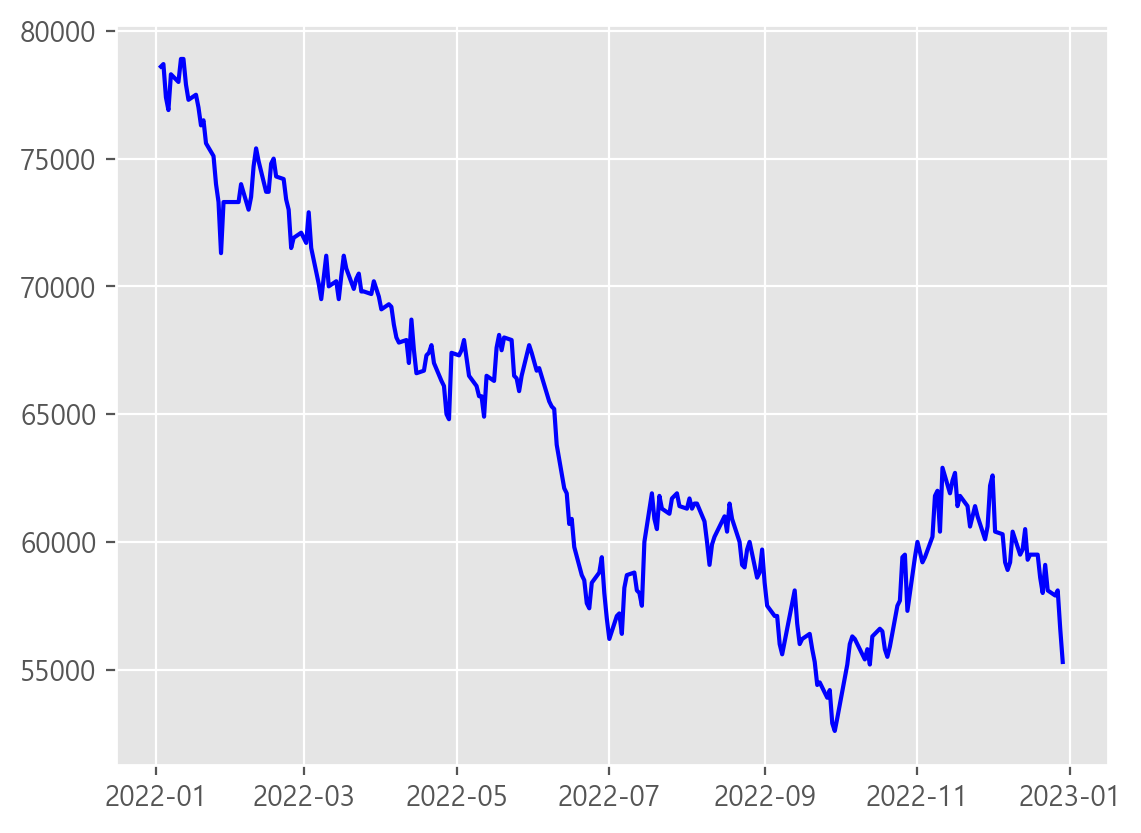

In [126]:
import matplotlib.pyplot as plt

plt.plot(sm["Close"],color= "b")

### (3) 공휴일 데이터 삭제

In [127]:
sm["Volume"] != 0

Date
2022-01-03    True
2022-01-04    True
2022-01-05    True
2022-01-06    True
2022-01-07    True
              ... 
2022-12-23    True
2022-12-26    True
2022-12-27    True
2022-12-28    True
2022-12-29    True
Name: Volume, Length: 246, dtype: bool

In [128]:
new_sm = sm[sm["Volume"] != 0]
new_sm.tail(5)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2022-12-23,58200,58400,57700,58100,9829407,-0.016920
2022-12-26,58000,58100,57700,57900,6756411,-0.003442
2022-12-27,58000,58400,57900,58100,10667027,0.003454
2022-12-28,57600,57600,56400,56600,14665410,-0.025818
2022-12-29,56000,56200,55300,55300,11295935,-0.022968


### (4) 5일 이동평균선 계산

In [129]:
MA5 = new_sm["Close"].rolling(window=5).mean()
MA5.tail(10)

Date
2022-12-16    59700.0
2022-12-19    59700.0
2022-12-20    59480.0
2022-12-21    58980.0
2022-12-22    58940.0
2022-12-23    58660.0
2022-12-26    58340.0
2022-12-27    58240.0
2022-12-28    57960.0
2022-12-29    57200.0
Name: Close, dtype: float64

In [130]:
MA5 = new_sm["Close"].rolling(window=5).mean()
new_sm.insert(len(new_sm.columns), "MA5", MA5)
new_sm.tail(5)

,Open,High,Low,Close,Volume,Change,MA5
Date,,,,,,,
2022-12-23,58200,58400,57700,58100,9829407,-0.016920,58660.0
2022-12-26,58000,58100,57700,57900,6756411,-0.003442,58340.0
2022-12-27,58000,58400,57900,58100,10667027,0.003454,58240.0
2022-12-28,57600,57600,56400,56600,14665410,-0.025818,57960.0
2022-12-29,56000,56200,55300,55300,11295935,-0.022968,57200.0


### (5) 20일, 60일, 120일 계산

In [131]:
ma20 = new_sm["Close"].rolling(window=20).mean()
ma60 = new_sm["Close"].rolling(window=60).mean()
ma120 = new_sm["Close"].rolling(window=120).mean()
new_sm.insert(len(new_sm.columns), "MA20", ma20)
new_sm.insert(len(new_sm.columns), "MA60", ma60)
new_sm.insert(len(new_sm.columns), "MA120", ma120)
ma20


Date
2022-01-03        NaN
2022-01-04        NaN
2022-01-05        NaN
2022-01-06        NaN
2022-01-07        NaN
               ...   
2022-12-23    59785.0
2022-12-26    59675.0
2022-12-27    59550.0
2022-12-28    59270.0
2022-12-29    58905.0
Name: Close, Length: 246, dtype: float64

### (6) 20일 평균선의 그래프 확인해보기

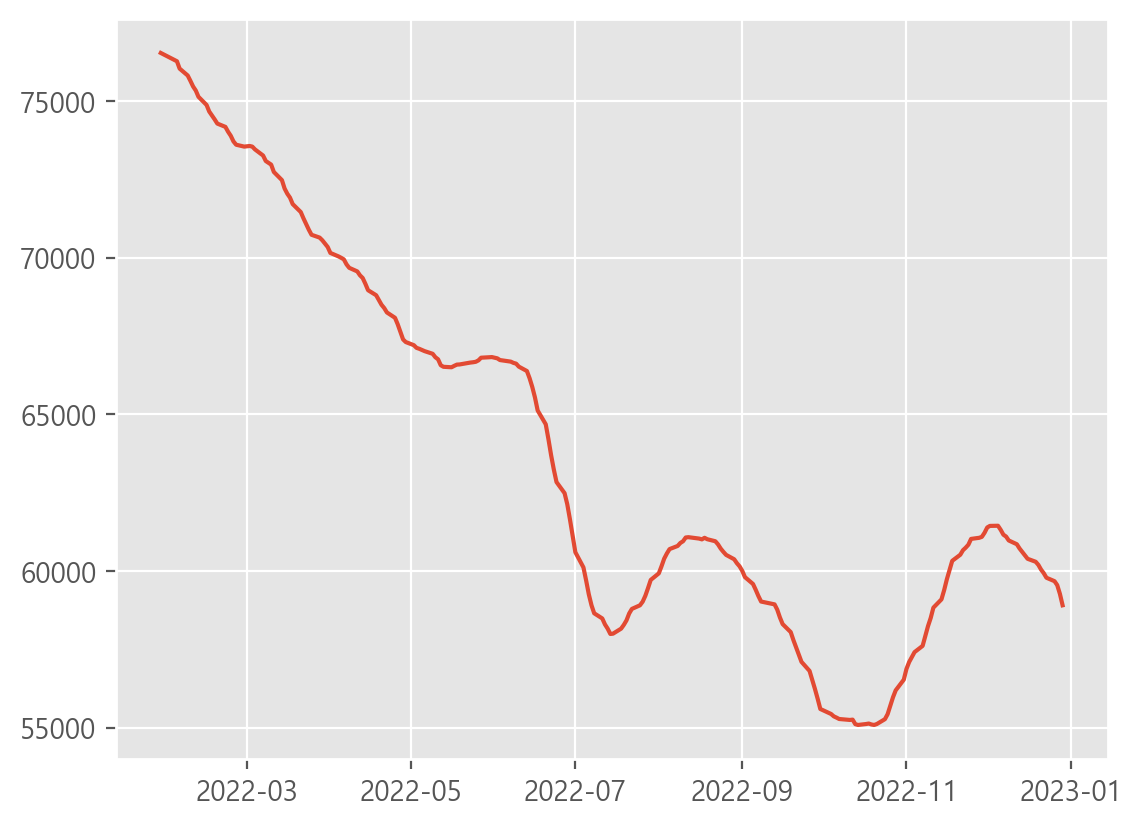

In [132]:
plt.plot(new_sm.index, new_sm["MA20"], label = "MA20")

### (7) 한 그래프에 5일, 20일, 60일, 120일 선 표현하기

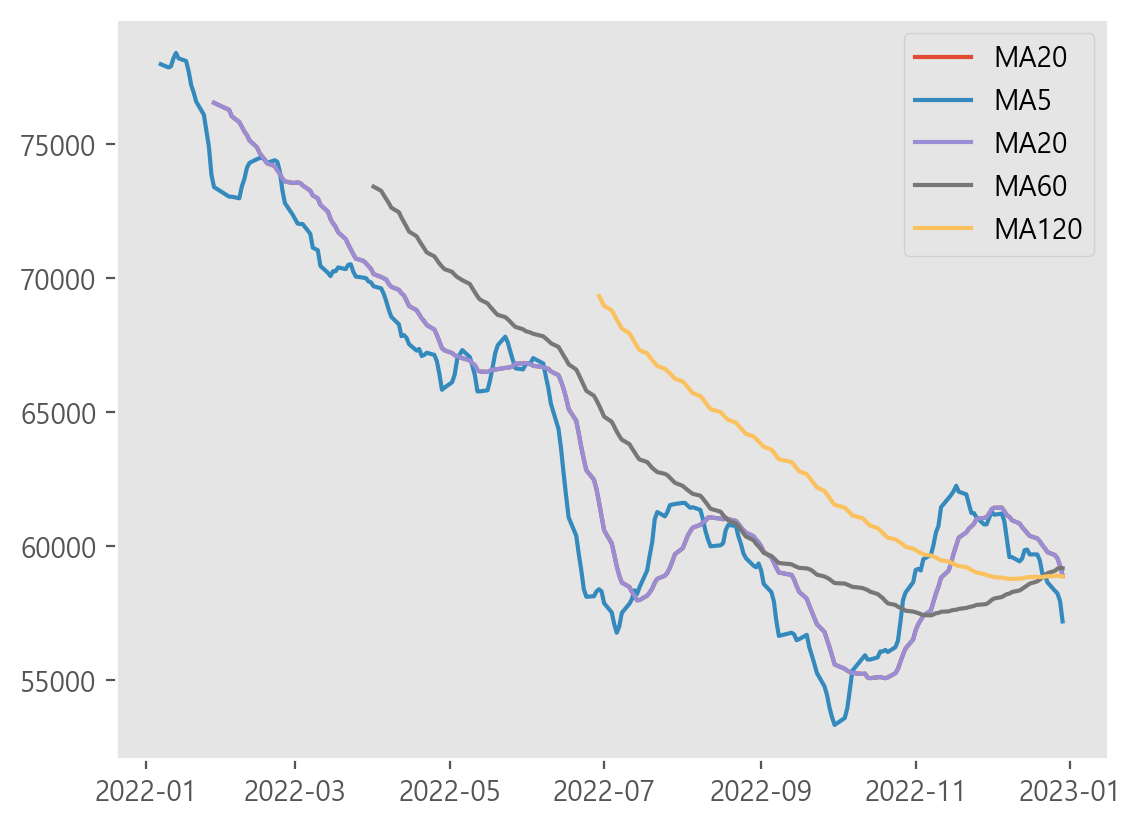

In [133]:
plt.plot(new_sm.index, new_sm["MA20"], label="MA20")
         
plt.plot(new_sm.index, new_sm["MA5"], label="MA5")
plt.plot(new_sm.index, new_sm["MA20"], label="MA20")
plt.plot(new_sm.index, new_sm["MA60"], label="MA60")
plt.plot(new_sm.index, new_sm["MA120"], label="MA120")

plt.legend(loc="best")
plt.grid()
plt.show()

### (8) 종합정리

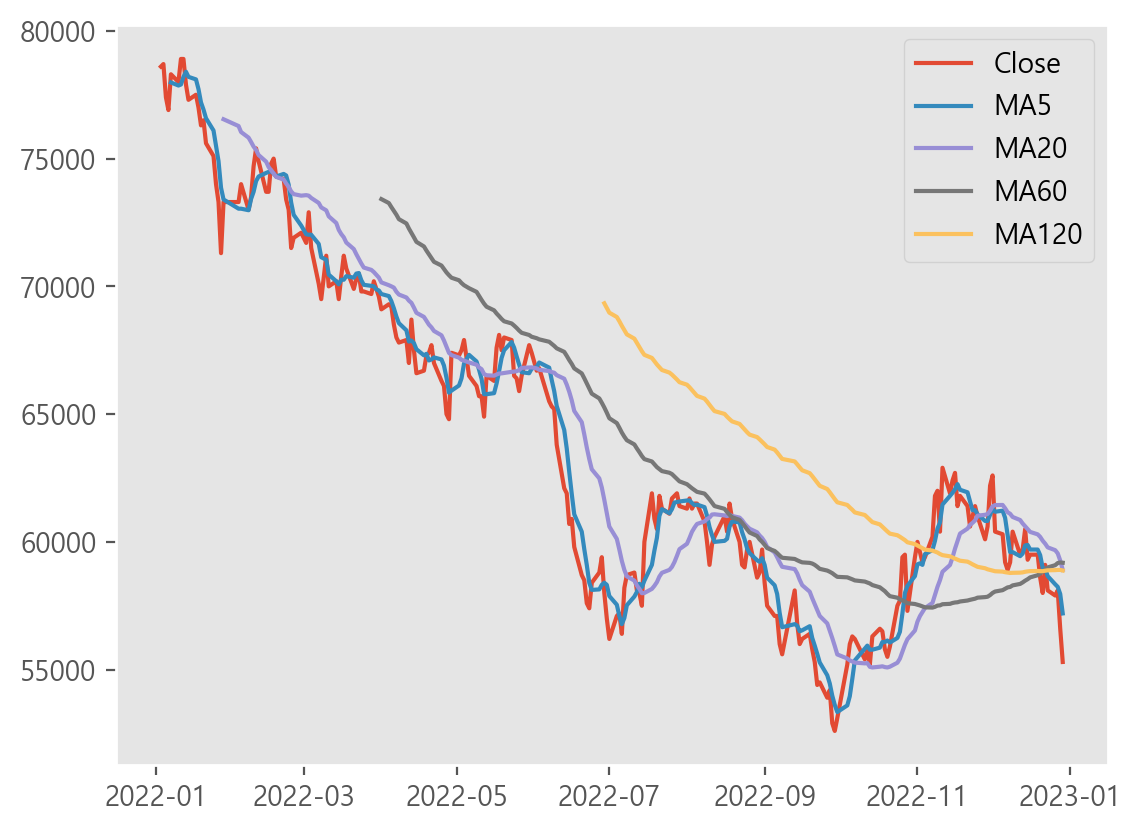

In [123]:
import pandas as pd
import FinanceDataReader as fdr
import matplotlib.pyplot as plt

sm = fdr.DataReader("005930", "2022-01-01", "2022-12-31")
new_sm = sm[sm["Volume"] !=0]

ma5 = new_sm["Close"].rolling(window=5).mean()
ma20 = new_sm["Close"].rolling(window=20).mean()
ma60 = new_sm["Close"].rolling(window=60).mean()
ma120 = new_sm["Close"].rolling(window=120).mean()

new_sm.insert(len(new_sm.columns), "MA5", ma5)
new_sm.insert(len(new_sm.columns), "MA20", ma20)
new_sm.insert(len(new_sm.columns), "MA60", ma60)
new_sm.insert(len(new_sm.columns), "MA120", ma120)

plt.plot(new_sm.index, new_sm["Close"], label="Close")
plt.plot(new_sm.index, new_sm["MA5"], label="MA5")
plt.plot(new_sm.index, new_sm["MA20"], label="MA20")
plt.plot(new_sm.index, new_sm["MA60"], label="MA60")
plt.plot(new_sm.index, new_sm["MA120"], label="MA120")

plt.legend(loc="best")
plt.grid()
plt.show()